Valor esperado SIN OBSERVACIONES:
 - No ir: 0.00
 - Ir   : -0.90
Decisión óptima: No ir

Probabilidades actualizadas con buen pronóstico (Z):
  Lluvia: 0.00
  Tráfico alto: 0.25
  Energía baja (≤5/10): 0.19
  Cancha ocupada: 0.29
  Condiciones ideales: 0.26
  Lluvia + Tráfico alto: 0.00

Valor esperado CON BUEN PRONÓSTICO:
 - No ir: 0.00
 - Ir   : 0.47
Decisión óptima: Ir


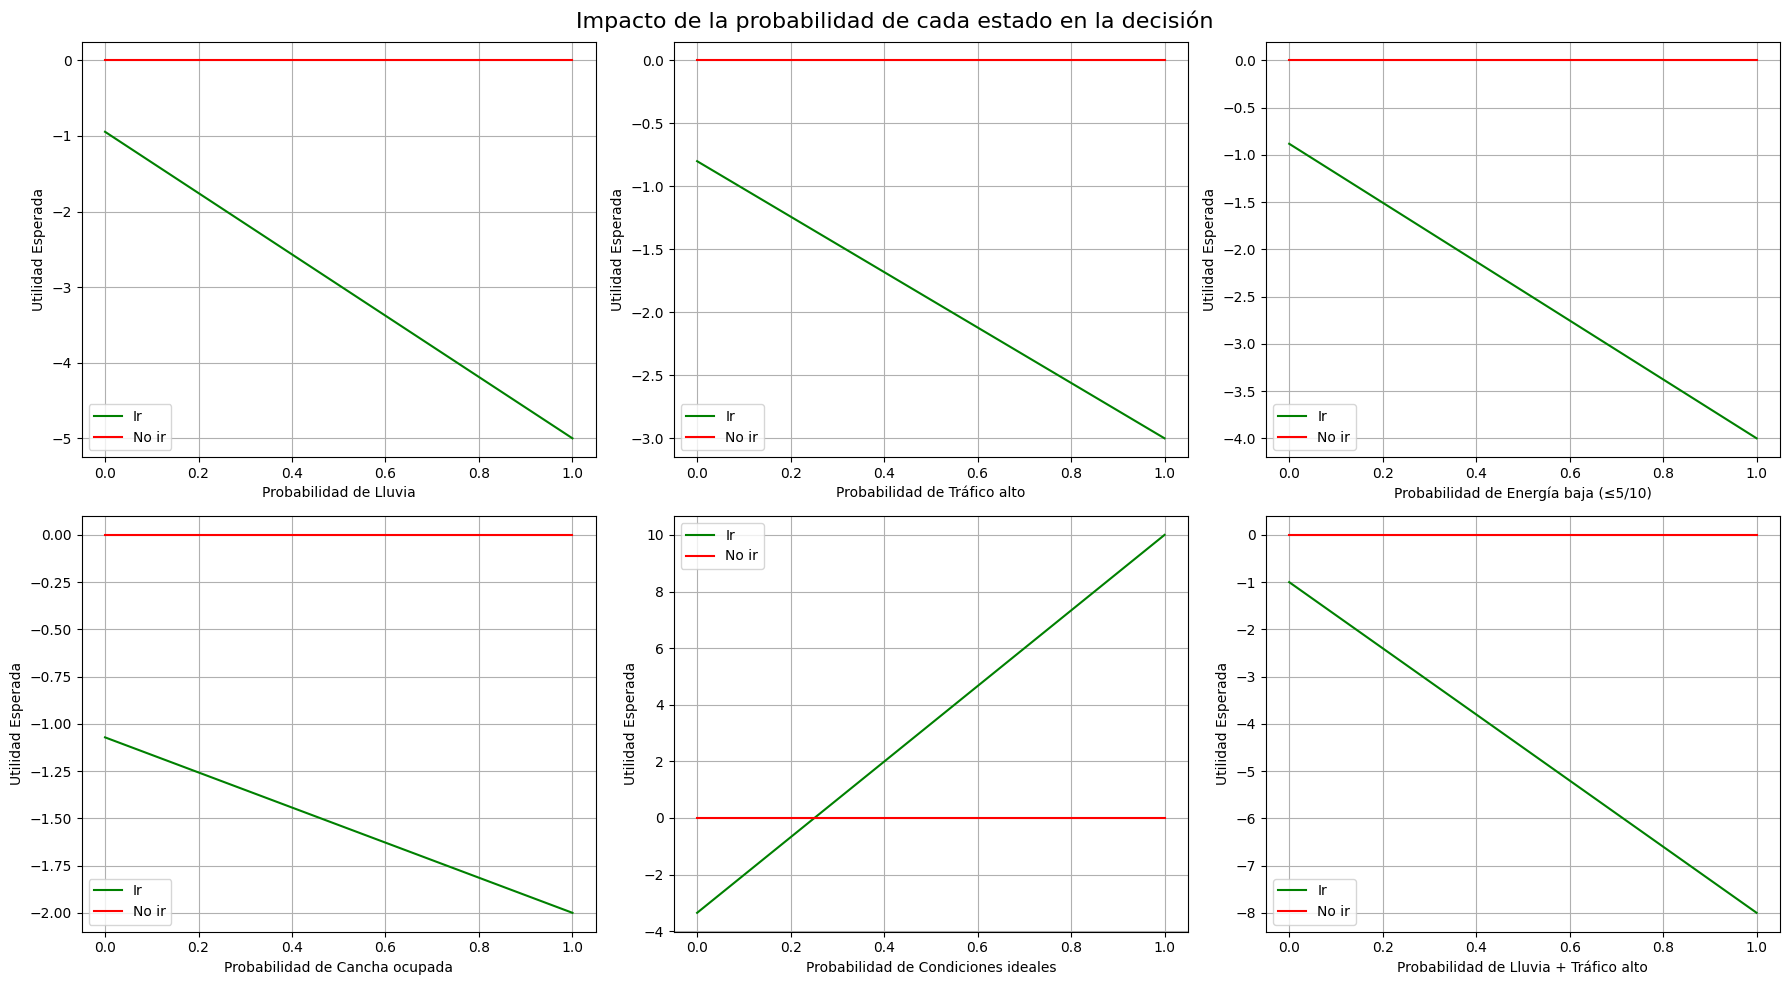

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# =============================================
# 1. DECISIONES Y ESTADOS DE LA NATURALEZA
# =============================================

# Estados posibles (combinaciones críticas)
estados = [
    "Lluvia",                  # ω1
    "Tráfico alto",            # ω2
    "Energía baja (≤5/10)",    # ω3
    "Cancha ocupada",          # ω4
    "Condiciones ideales",     # ω5 (No lluvia + Cancha libre + Energía alta)
    "Lluvia + Tráfico alto"    # ω6
]

decisiones = ["No ir", "Ir"]

# =============================================
# 2. MATRIZ DE UTILIDADES (U)
# =============================================
U = np.array([
    # No Ir | Ir
    [   0,    -5   ],  # ω1: Lluvia
    [   0,    -3   ],  # ω2: Tráfico alto
    [   0,    -4   ],  # ω3: Energía baja
    [   0,    -2   ],  # ω4: Cancha ocupada
    [   0,    +10  ],  # ω5: Condiciones ideales
    [   0,    -8   ]   # ω6: Lluvia + Tráfico alto
])

# =============================================
# 3. PROBABILIDADES A PRIORI (p(ω))
# =============================================
p_omega = np.array([
    0.10,  # ω1: Lluvia (10%)
    0.30,  # ω2: Tráfico alto (30%)
    0.20,  # ω3: Energía baja (20% asumido)
    0.40,  # ω4: Cancha ocupada (40%)
    0.25,  # ω5: Condiciones ideales (25%)
    0.05   # ω6: Lluvia + Tráfico alto (5%)
])

# Verificar que sumen 1

# =============================================
# 4. CÁLCULO DE UTILIDAD ESPERADA (SIN OBSERVACIONES)
# =============================================
VE_no_ir = np.sum(p_omega * U[:, 0])
VE_ir    = np.sum(p_omega * U[:, 1])

print("Valor esperado SIN OBSERVACIONES:")
print(f" - No ir: {VE_no_ir:.2f}")
print(f" - Ir   : {VE_ir:.2f}")
print(f"Decisión óptima: {'No ir' if VE_no_ir > VE_ir else 'Ir'}")

# =============================================
# 5. INFORMACIÓN PROXY (Z) - Ejemplo: Pronóstico favorable (Z1=0% lluvia)
# =============================================
# Probabilidad condicional p(Z=buen_pronóstico | ω)
p_z_given_omega = np.array([
    0.01,  # ω1: Si hay lluvia, casi nunca hay buen pronóstico
    0.80,  # ω2: Tráfico no afecta al pronóstico
    0.90,  # ω3: Energía baja no relacionada
    0.70,  # ω4: Cancha ocupada no relacionada
    0.99,  # ω5: Condiciones ideales casi siempre con buen pronóstico
    0.05   # ω6: Mala combinación
])

# Actualizar probabilidades con Bayes
p_z = np.sum(p_z_given_omega * p_omega)
post_omega_z = (p_z_given_omega * p_omega) / p_z

print("\nProbabilidades actualizadas con buen pronóstico (Z):")
for i, st in enumerate(estados):
    print(f"  {st}: {post_omega_z[i]:.2f}")

# Recalcular utilidad esperada
VE_no_ir_z = np.sum(post_omega_z * U[:, 0])
VE_ir_z    = np.sum(post_omega_z * U[:, 1])

print("\nValor esperado CON BUEN PRONÓSTICO:")
print(f" - No ir: {VE_no_ir_z:.2f}")
print(f" - Ir   : {VE_ir_z:.2f}")
print(f"Decisión óptima: {'No ir' if VE_no_ir_z > VE_ir_z else 'Ir'}")

# =============================================
# =============================================
# 6. VISUALIZACIÓN (Impacto de cada estado ω en la decisión)
# =============================================

# Configurar subplots para cada estado
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Impacto de la probabilidad de cada estado en la decisión", fontsize=16)

# Probabilidades originales (ajustadas para sumar 1)
p_omega_original = np.array([0.10, 0.25, 0.15, 0.30, 0.15, 0.05])

for idx, (estado, ax) in enumerate(zip(estados, axes.flatten())):
    p_range = np.linspace(0, 1, 50)
    VE_ir_list = []
    VE_no_ir_list = []
    
    for p in p_range:
        # Copiar probabilidades originales
        p_temp = p_omega_original.copy()
        
        # 1. Fijar probabilidad del estado actual a p
        p_temp[idx] = p
        
        # 2. Redistribuir la masa restante (1 - p) proporcionalmente en los demás estados
        mask = np.ones(len(p_temp), dtype=bool)
        mask[idx] = False  # Excluir el estado actual
        sum_otros = np.sum(p_temp[mask])
        if sum_otros > 0:
            p_temp[mask] = (p_temp[mask] / sum_otros) * (1 - p)
        else:
            p_temp[mask] = 0  # Caso extremo (p=1)
        
        # Calcular utilidades esperadas
        VE_ir = np.sum(p_temp * U[:, 1])
        VE_no_ir = np.sum(p_temp * U[:, 0])
        
        VE_ir_list.append(VE_ir)
        VE_no_ir_list.append(VE_no_ir)
    
    # Graficar
    ax.plot(p_range, VE_ir_list, label="Ir", color="green")
    ax.plot(p_range, VE_no_ir_list, label="No ir", color="red")
    ax.set_xlabel(f"Probabilidad de {estado}")
    ax.set_ylabel("Utilidad Esperada")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()